In [2]:
import numpy as np

In [3]:
data = np.genfromtxt("ASTR19_F24_group_project_data.txt", dtype = [('day', 'i8'), ('time', 'U6'), ('height', 'f8')])

day = []
time = []
height = []

for i in range(82):
    day.append(data[i][0])
    time.append(data[i][1])
    height.append(data[i][2])
    
print(day)
print(' ')
print(time)
print(' ')
print(height)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 19, 20, 20, 21, 21, 22, 22, 23, 23, 24, 24, 25, 25, 26, 26, 27, 27, 28, 28, 29, 29, 30, 30, 31, 31, 32, 32, 33, 33, 34, 34, 35, 35, 36, 36, 37, 37, 38, 38, 39, 39, 40, 40, 41, 41]
 
['8:07', '15:37', '8:55', '16:25', '9:45', '17:14', '10:35', '18:00', '11:28', '18:46', '12:22', '19:31', '13:24', '20:16', '3:22', '21:01', '4:07', '21:46', '4:50', '11:58', '5:31', '12:56', '6:08', '13:45', '6:47', '14:25', '7:22', '15:00', '7:59', '15:34', '8:34', '16:08', '9:10', '16:41', '9:45', '17:12', '10:21', '17:45', '10:57', '18:15', '11:38', '18:48', '12:25', '19:20', '2:22', '19:52', '2:58', '20:30', '3:37', '10:44', '4:23', '11:55', '5:15', '12:57', '6:09', '13:50', '7:05', '14:39', '7:58', '15:27', '8:50', '16:10', '9:40', '16:52', '10:30', '17:34', '11:19', '18:12', '12:10', '18:49', '1:32', '19:24', '2:13', '20:00', '2:54', '9:54', '3:39', '11:15', '4:29', '12:2

In [4]:
from datetime import datetime

time_in_days = [datetime.strptime(i, '%H:%M').hour / 24 + datetime.strptime(i, '%H:%M').minute / (24 * 60) for i in time]
time_array = np.array(time_in_days)
time_array

array([0.33819444, 0.65069444, 0.37152778, 0.68402778, 0.40625   ,
       0.71805556, 0.44097222, 0.75      , 0.47777778, 0.78194444,
       0.51527778, 0.81319444, 0.55833333, 0.84444444, 0.14027778,
       0.87569444, 0.17152778, 0.90694444, 0.20138889, 0.49861111,
       0.22986111, 0.53888889, 0.25555556, 0.57291667, 0.28263889,
       0.60069444, 0.30694444, 0.625     , 0.33263889, 0.64861111,
       0.35694444, 0.67222222, 0.38194444, 0.69513889, 0.40625   ,
       0.71666667, 0.43125   , 0.73958333, 0.45625   , 0.76041667,
       0.48472222, 0.78333333, 0.51736111, 0.80555556, 0.09861111,
       0.82777778, 0.12361111, 0.85416667, 0.15069444, 0.44722222,
       0.18263889, 0.49652778, 0.21875   , 0.53958333, 0.25625   ,
       0.57638889, 0.29513889, 0.61041667, 0.33194444, 0.64375   ,
       0.36805556, 0.67361111, 0.40277778, 0.70277778, 0.4375    ,
       0.73194444, 0.47152778, 0.75833333, 0.50694444, 0.78402778,
       0.06388889, 0.80833333, 0.09236111, 0.83333333, 0.12083

In [5]:
x_axis = time_array + day
x_axis

array([ 1.33819444,  1.65069444,  2.37152778,  2.68402778,  3.40625   ,
        3.71805556,  4.44097222,  4.75      ,  5.47777778,  5.78194444,
        6.51527778,  6.81319444,  7.55833333,  7.84444444,  8.14027778,
        8.87569444,  9.17152778,  9.90694444, 10.20138889, 10.49861111,
       11.22986111, 11.53888889, 12.25555556, 12.57291667, 13.28263889,
       13.60069444, 14.30694444, 14.625     , 15.33263889, 15.64861111,
       16.35694444, 16.67222222, 17.38194444, 17.69513889, 18.40625   ,
       18.71666667, 19.43125   , 19.73958333, 20.45625   , 20.76041667,
       21.48472222, 21.78333333, 22.51736111, 22.80555556, 23.09861111,
       23.82777778, 24.12361111, 24.85416667, 25.15069444, 25.44722222,
       26.18263889, 26.49652778, 27.21875   , 27.53958333, 28.25625   ,
       28.57638889, 29.29513889, 29.61041667, 30.33194444, 30.64375   ,
       31.36805556, 31.67361111, 32.40277778, 32.70277778, 33.4375    ,
       33.73194444, 34.47152778, 34.75833333, 35.50694444, 35.78

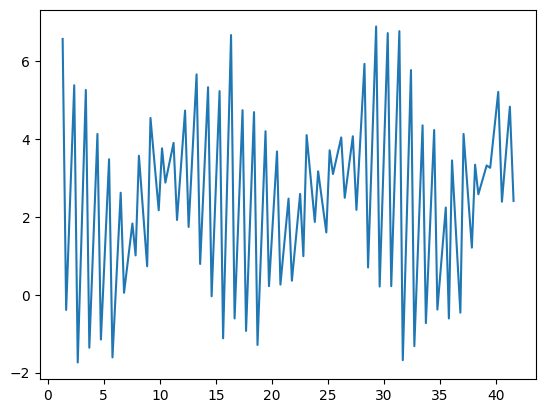

In [6]:
import matplotlib.pyplot as plt
plt.plot(x_axis, height)

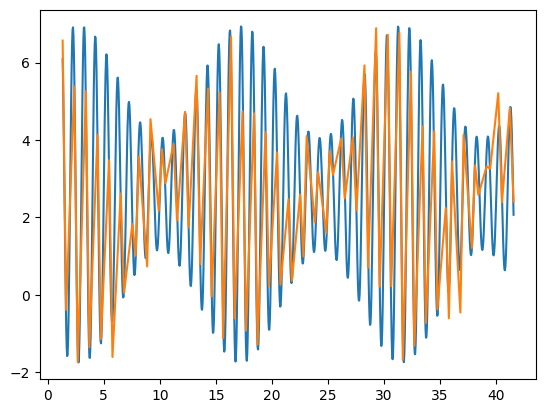

In [11]:
from scipy import optimize

def tidal_oscillation(x, A, B, C, D, E, F, G, H):
    return (A * np.sin(B * x + C) + D) * E * np.sin(F * x + G) + H

y_mean = np.mean(height)

params, covariance = optimize.curve_fit(tidal_oscillation, x_axis, height, p0=[1, 2* np.pi/12.48, 1, 1, 1, 2*np.pi, 1, 1], sigma=np.full(len(height), 0.25))
a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit, h_fit = params

x_fit = np.linspace(np.min(x_axis), np.max(x_axis), 1000)
tide_fit = tidal_oscillation(x_fit, a_fit, b_fit, c_fit, d_fit, e_fit, f_fit, g_fit, h_fit)


plt.figure()
plt.plot(x_fit, tide_fit)
# plt.plot(x_axis, (c_fit+a_fit)*np.sin(b_fit*0.85*x_axis -1) + d_fit)
plt.plot(x_axis, height)

In [12]:
y_data = np.array(height)
y_pred = tidal_oscillation(x_axis, *params)

residuals = y_data - y_pred
print(f"Residuals: {residuals}\n")

res_mean = np.mean(residuals)
print(f"Residuals Mean: {res_mean}")

res_std = np.std(residuals)
print(f"Residuals STD: {res_std}")

Residuals: [ 4.79338667e-01  3.60523066e-01 -3.99458266e-01 -3.84239124e-01
  1.98176035e-01  1.82491404e-01  2.55313445e-04  1.14739129e-01
  3.16399690e-01 -9.68097634e-01  2.20031384e-01 -8.71975362e-02
 -3.82637841e-02  1.35221860e-01 -4.74947403e-01 -6.99882153e-01
  5.93528405e-01  4.02535347e-01 -2.21062976e-01  2.13885800e-01
 -3.40406571e-01 -3.16965856e-01  2.27060539e-02  6.64905311e-02
  3.84807284e-01 -1.87190225e-01 -4.58583985e-01 -2.47421737e-01
 -8.46456757e-01 -5.81664212e-01  6.12036835e-01  5.06659747e-01
 -9.54002082e-01  4.61615093e-01 -3.91852580e-01  1.76863799e-02
 -1.30695851e-01  1.13640022e+00  7.20690604e-02  5.73960922e-01
 -5.06977601e-01  1.67972370e-02  8.29027465e-02  8.99459178e-02
  6.04118983e-01  6.21937941e-01 -3.94491943e-01  2.24541362e-01
 -8.23201874e-02 -1.24754701e-01 -2.28221597e-01 -2.93439941e-01
 -8.89357509e-01  4.80888597e-02  2.37167129e-01 -5.95472937e-01
  6.64128610e-01 -1.46677520e-01  3.56631840e-01  7.43213464e-01
  7.39131624e-

Intrinsic Scatter: 0.41257990530988736


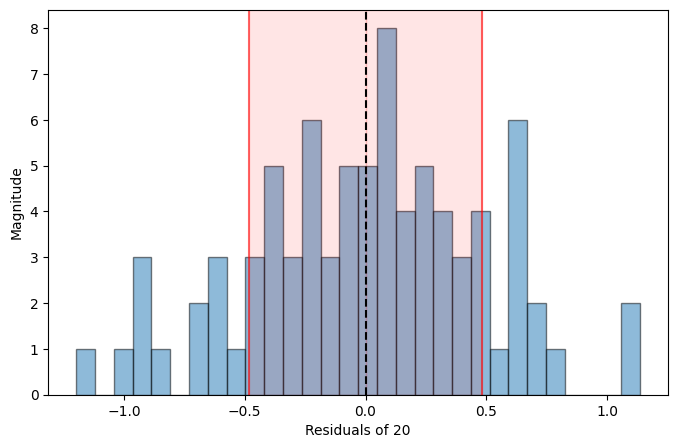

In [26]:
bins = 30
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins,alpha=0.5, edgecolor='black')
plt.xlabel('Residuals of 20')
plt.ylabel('Magnitude')
plt.plot(res_std)
plt.axvline(res_mean,color='black', linestyle='dashed')
plt.axvline(res_mean + res_std, color='red',alpha=0.6)
plt.axvline(res_mean - res_std, color='red', alpha=0.6)
plt.axvspan(0,res_std, color='red',alpha=0.1)
plt.axvspan(0,-res_std, color='red',alpha=0.1)
plt.savefig('Residual Histogram.pdf', bbox_inches='tight', facecolor='white')

int_scatter = np.sqrt((np.square(res_std))-(np.square(0.25)))
print(f"Intrinsic Scatter: {int_scatter}")

Residuals: [ 4.79338667e-01  3.60523066e-01 -3.99458266e-01 -3.84239124e-01
  1.98176035e-01  1.82491404e-01  2.55313445e-04  1.14739129e-01
  3.16399690e-01 -9.68097634e-01  2.20031384e-01 -8.71975362e-02
 -3.82637841e-02  1.35221860e-01 -4.74947403e-01 -6.99882153e-01
  5.93528405e-01  4.02535347e-01 -2.21062976e-01  2.13885800e-01
 -3.40406571e-01 -3.16965856e-01  2.27060539e-02  6.64905311e-02
  3.84807284e-01 -1.87190225e-01  1.54141601e+00 -2.47421737e-01
 -8.46456757e-01 -5.81664212e-01  6.12036835e-01  5.06659747e-01
 -9.54002082e-01  4.61615093e-01 -3.91852580e-01  1.76863799e-02
 -1.30695851e-01  1.13640022e+00  7.20690604e-02  5.73960922e-01
 -5.06977601e-01  1.67972370e-02  8.29027465e-02  8.99459178e-02
  6.04118983e-01  6.21937941e-01 -3.94491943e-01  2.24541362e-01
 -8.23201874e-02 -1.24754701e-01 -2.28221597e-01 -2.93439941e-01
 -8.89357509e-01  4.80888597e-02  2.37167129e-01 -5.95472937e-01
  6.64128610e-01 -1.46677520e-01  3.56631840e-01  7.43213464e-01
  7.39131624e-

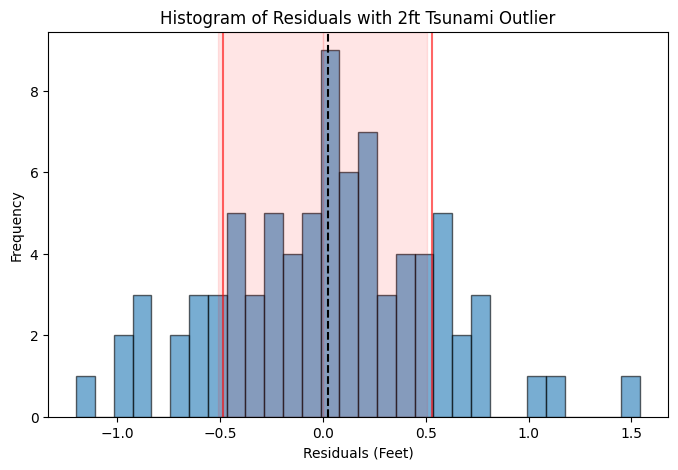

Standard deviation of new residuals: 0.5084661765336105
Intrinsic Scatter: 0.4427616206026768
The 2ft tsunami deviation corresponds to 4.14582636 standard deviations.


In [25]:
# During the first high-tide of January 14, the tsunami from the underwater eruption of the Hunga
# Tonga-Hunga Ha'apai volcano reached the shores of Santa Cruz. The tsunami increased water levels near 
# high tide by about 2ft. How large of a deviation is this tsunami, in terms of standard deviations of the 
# distribution of normal tides from the model? Add a single 2ft outlier to the histogram of data and replot it 
# as part of your Jupyter notebook

tsunamiDev = 2.0

deviationSTD = tsunamiDev / res_std

#Change height of high tide by 2ft on January 14th
height[26] = height[26] + 2.0

y_data = np.array(height)
y_pred = tidal_oscillation(x_axis, *params)
new_residuals = y_data - y_pred
print(f"Residuals: {new_residuals}")

new_res_mean = np.mean(new_residuals)
new_res_std = np.std(new_residuals)

int_scatter = np.sqrt((np.square(new_res_std))-(np.square(0.25)))

plt.figure(figsize=(8,5))
plt.hist(new_residuals, bins, edgecolor='black', alpha=0.6)
plt.title("Histogram of Residuals with 2ft Tsunami Outlier")
plt.xlabel("Residuals (Feet)")
plt.ylabel("Frequency")

plt.plot(new_res_std)
plt.axvline(new_res_mean,color='black', linestyle='dashed')
plt.axvline(new_res_mean + new_res_std, color='red',alpha=0.6)
plt.axvline(new_res_mean - new_res_std, color='red', alpha=0.6)
plt.axvspan(0,new_res_std, color='red',alpha=0.1)
plt.axvspan(0,-new_res_std, color='red',alpha=0.1)
plt.savefig('tsunami_residual_histogram.pdf', bbox_inches='tight', facecolor='white')
plt.show()

print(f"Standard deviation of new residuals: {new_res_std}")
print(f"Intrinsic Scatter: {int_scatter}")
print(f"The 2ft tsunami deviation corresponds to {deviationSTD:.8f} standard deviations.")